#Importing the libraries

In [ ]:
from __future__ import absolute_import
from __future__ import print_function

import numpy as np
from numpy import genfromtxt

import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
from pandas import read_csv

import csv
import pprint

import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers, models

import keras
from pandas import read_csv
from keras.models import Sequential
from keras import layers
#from keras.optimizers import SGD
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense
#from keras.optimizers import SGD

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
import random
from pprint import pprint

from sklearn.preprocessing import LabelEncoder
import gspread
import pandas as pd
import pickle 
import pywt
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers
from tensorflow.keras.utils import to_categorical

from time import time
t00 = time()
import os
from tensorflow.keras import layers
from keras.layers import Input, Dense, concatenate
from keras.models import Model

In [ ]:
# Initialize the TPU and spread the computations across the 8 cores
import tensorflow as tf 
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='')
tf.config.experimental_connect_to_cluster(resolver)
# This is the TPU initialization code that has to be at the beginning.
tf.tpu.experimental.initialize_tpu_system(resolver)
tf.config.list_logical_devices('TPU')
#print("All devices: ", tf.config.list_logical_devices('TPU'))

strategy = tf.distribute.TPUStrategy(resolver)

INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Initializing the TPU system: grpc://10.125.170.26:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.125.170.26:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


#Importing the data

In [ ]:
N_cut = 52

# Aminoacids

# 0 - 4 
DL_Alpha_Alanine_Train = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/DL_Alpha_Alanine_Train.csv", delimiter=',', names=True, dtype=float)
DL_Alpha_Alanine_Test = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/DL_Alpha_Alanine_Test.csv", delimiter=',', names=True, dtype=float)

DL_Aspartic_Acid_Train = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/DL_Aspartic_Acid_Train.csv", delimiter=',', names=True, dtype=float)
DL_Aspartic_Acid_Test = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/DL_Aspartic_Acid_Test.csv", delimiter=',', names=True, dtype=float)

DL_Isoleucine_Train = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/DL_Isoleucine_Train.csv", delimiter=',', names=True, dtype=float)
DL_Isoleucine_Test = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/DL_Isoleucine_Test.csv", delimiter=',', names=True, dtype=float)

DL_Leucine_Train = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/DL_Leucine_Train.csv", delimiter=',', names=True, dtype=float)
DL_Leucine_Test = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/DL_Leucine_Test.csv", delimiter=',', names=True, dtype=float)

DL_Methionine_Train = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/DL_Methionine_Train.csv", delimiter=',', names=True, dtype=float)
DL_Methionine_Test = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/DL_Methionine_Test.csv", delimiter=',', names=True, dtype=float)

# 5 - 9 

DL_Phenylalanine_Train = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/DL_Phenylalanine_Train.csv", delimiter=',', names=True, dtype=float)
DL_Phenylalanine_Test = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/DL_Phenylalanine_Test.csv", delimiter=',', names=True, dtype=float)

DL_Serine_Train = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/DL_Serine_Train.csv", delimiter=',', names=True, dtype=float)
DL_Serine_Test = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/DL_Serine_Test.csv", delimiter=',', names=True, dtype=float)

DL_Threonine_Train = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/DL_Threonine_Train.csv", delimiter=',', names=True, dtype=float)
DL_Threonine_Test = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/DL_Threonine_Test.csv", delimiter=',', names=True, dtype=float)

DL_Tyrosine_Train = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/DL_Tyrosine_Train.csv", delimiter=',', names=True, dtype=float)
DL_Tyrosine_Test = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/DL_Tyrosine_Test.csv", delimiter=',', names=True, dtype=float)

DL_Valine_Train = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/DL_Valine_Train.csv", delimiter=',', names=True, dtype=float)
DL_Valine_Test = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/DL_Valine_Test.csv", delimiter=',', names=True, dtype=float)

# 10 - 14

Glycine_Train = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/Glycine_Train.csv", delimiter=',', names=True, dtype=float)
Glycine_Test = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/Glycine_Test.csv", delimiter=',', names=True, dtype=float)

L_Arginine_HCl_Train = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/L_Arginine_HCl_Train.csv", delimiter=',', names=True, dtype=float)
L_Arginine_HCl_Test = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/L_Arginine_HCl_Test.csv", delimiter=',', names=True, dtype=float)

L_Asparagine_Monohydrate_Train = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/L_Asparagine_Monohydrate_Train.csv", delimiter=',', names=True, dtype=float)
L_Asparagine_Monohydrate_Test = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/L_Asparagine_Monohydrate_Test.csv", delimiter=',', names=True, dtype=float)

L_Cystine_Train = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/L_Cystine_Train.csv", delimiter=',', names=True, dtype=float)
L_Cystine_Test = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/L_Cystine_Test.csv", delimiter=',', names=True, dtype=float)

L_Glutamic_Acid_Train = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/L_Glutamic_Acid_Train.csv", delimiter=',', names=True, dtype=float)
L_Glutamic_Acid_Test = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/L_Glutamic_Acid_Test.csv", delimiter=',', names=True, dtype=float)

# 15 - 19

L_Histidine_HCl_Train = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/L_Histidine_HCl_Train.csv", delimiter=',', names=True, dtype=float)
L_Histidine_HCl_Test = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/L_Histidine_HCl_Test.csv", delimiter=',', names=True, dtype=float)

L_Lysine_HCl_Train = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/L_Lysine_HCl_Train.csv", delimiter=',', names=True, dtype=float)
L_Lysine_HCl_Test = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/L_Lysine_HCl_Test.csv", delimiter=',', names=True, dtype=float)

L_PLUS_Cysteine_HCl_Train = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/L_PLUS_Cysteine_HCl_Train.csv", delimiter=',', names=True, dtype=float)
L_PLUS_Cysteine_HCl_Test = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/L_PLUS_CysteineHydrochloride_Test.csv", delimiter=',', names=True, dtype=float)

L_Proline_Train = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/L_Proline_Train.csv", delimiter=',', names=True, dtype=float)
L_Proline_Test = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/L_Proline_Test.csv", delimiter=',', names=True, dtype=float)

L_Tryptophan_Train = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/L_Tryptophan_Train.csv", delimiter=',', names=True, dtype=float)
L_Tryptophan_Test = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/L_Tryptophan_Test.csv", delimiter=',', names=True, dtype=float)

# Other chemicals
# 20 - 24

Ampicillin_Sodium_Train = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/Ampicillin_Sodium_Train.csv", delimiter=',', names=True, dtype=float)
Ampicillin_Sodium_Test = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/Ampicillin_Sodium_Test.csv", delimiter=',', names=True, dtype=float)

Anthrone_Train = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/Anthrone_Train.csv", delimiter=',', names=True, dtype=float)
Anthrone_Test = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/Anthrone_Test.csv", delimiter=',', names=True, dtype=float)

beta_Estradiol_Train = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/beta_Estradiol_Train.csv", delimiter=',', names=True, dtype=float)
beta_Estradiol_Test = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/beta_Estradiol_Test.csv", delimiter=',', names=True, dtype=float)

CHAPS_Train = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/CHAPS_Train.csv", delimiter=',', names=True, dtype=float)
CHAPS_Test = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/CHAPS_Test.csv", delimiter=',', names=True, dtype=float)

Chloroquine_Train = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/Chloroquine_Train.csv", delimiter=',', names=True, dtype=float)
Chloroquine_Test = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/Chloroquine_Test.csv", delimiter=',', names=True, dtype=float)

# 25 - 29

D_PLUS_Maltose_Monohydrate_Train = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/D_PLUS_Maltose_Monohydrate_Train.csv", delimiter=',', names=True, dtype=float)
D_PLUS_Maltose_Monohydrate_Test = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/D_PLUS_MaltoseMonohydrate_Test.csv", delimiter=',', names=True, dtype=float)

Fluconazole_Train = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/Fluconazole_Train.csv", delimiter=',', names=True, dtype=float)
Fluconazole_Test = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/Fluconazole_Test.csv", delimiter=',', names=True, dtype=float)

Forskolin_Train = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/Forskolin_Train.csv", delimiter=',', names=True, dtype=float)
Forskolin_Test = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/Forskolin_Test.csv", delimiter=',', names=True, dtype=float)

Laminarin_Train = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/Laminarin_Train.csv", delimiter=',', names=True, dtype=float)
Laminarin_Test = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/Laminarin_Test.csv", delimiter=',', names=True, dtype=float)

Lauric_Acid_Train = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/Lauric_Acid_Train.csv", delimiter=',', names=True, dtype=float)
Lauric_Acid_Test = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/Lauric_Acid_Test.csv", delimiter=',', names=True, dtype=float)

# 30 - 34

Methyl_Viologen_Train = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/Methyl_Viologen_Train.csv", delimiter=',', names=True, dtype=float)
Methyl_Viologen_Test = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/Methyl_Viologen_Test.csv", delimiter=',', names=True, dtype=float)

MOPS_Train = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/MOPS_Train.csv", delimiter=',', names=True, dtype=float)
MOPS_Test = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/MOPS_Test.csv", delimiter=',', names=True, dtype=float)

Na_Salt_Train = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/Na_Salt_Train.csv", delimiter=',', names=True, dtype=float)
Na_Salt_Test = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/Na_Salt_Test.csv", delimiter=',', names=True, dtype=float)

Polyvinyl_Pyrrolidone_Train = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/Polyvinyl_Pyrrolidone_Train.csv", delimiter=',', names=True, dtype=float)
Polyvinyl_Pyrrolidone_Test = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/Polyvinyl_Pyrrolidone_Test.csv", delimiter=',', names=True, dtype=float)

Potato_Starch_Train = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/Potato_Starch_Train.csv", delimiter=',', names=True, dtype=float)
Potato_Starch_Test = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/Potato_Starch_Test.csv", delimiter=',', names=True, dtype=float)

# 35 - 39

Progesterone_Train = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/Progesterone_Train.csv", delimiter=',', names=True, dtype=float)
Progesterone_Test = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/Progesterone_Test.csv", delimiter=',', names=True, dtype=float)

Sodium_Deoxycholate_Train = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/Sodium_Deoxycholate_Train.csv", delimiter=',', names=True, dtype=float)
Sodium_Deoxycholate_Test = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/Sodium_Deoxycholate_Test.csv", delimiter=',', names=True, dtype=float)

Sodium_Dodecylsulfate_Train = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/Sodium_Dodecylsulfate_Train.csv", delimiter=',', names=True, dtype=float)
Sodium_Dodecylsulfate_Test = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/Sodium_Dodecylsulfate_Test.csv", delimiter=',', names=True, dtype=float)

Uridine_Train = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/Uridine_Train.csv", delimiter=',', names=True, dtype=float)
Uridine_Test = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/Uridine_Test.csv", delimiter=',', names=True, dtype=float)

Silver_Nitrate_Train = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/Silver_Nitrate_Train.csv", delimiter=',', names=True, dtype=float)
Silver_Nitrate_Test = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/Silver_Nitrate_Test.csv", delimiter=',', names=True, dtype=float)

#Train only on the first 20 classes

In [ ]:
N_cut = 52
N_classes = 20

train_data = np.zeros((N_classes*2500, 1024 - N_cut))
train_label = np.zeros(N_classes*2500)

for i in range(1024 - N_cut - 1):
    for j in range(2500):
        
        # DL_Alpha_Alanine_Train, label 0
        train_data[j][i] = (DL_Alpha_Alanine_Train[i + N_cut][j])
        train_label[j] = 0
        
        # DL_Aspartic_Acid_Train, label 1
        train_data[j + 1*2500][i] = (DL_Aspartic_Acid_Train[i + N_cut][j])
        train_label[j + 1*2500] = 1
        
        # DL_Isoleucine_Train, label 2
        train_data[j + 2*2500][i] = (DL_Isoleucine_Train[i + N_cut][j])
        train_label[j + 2*2500] = 2
        
        # DL_Leucine_Train, label 3
        train_data[j + 3*2500][i] = (DL_Leucine_Train[i + N_cut][j])
        train_label[j + 3*2500] = 3
        
        # DL_Methionine_Train, label 4
        train_data[j + 4*2500][i] = (DL_Methionine_Train[i + N_cut][j])
        train_label[j + 4*2500] = 4
        
        # DL_Phenylalanine_Train, label 5
        train_data[j + 5*2500][i] = (DL_Phenylalanine_Train[i + N_cut][j])
        train_label[j + 5*2500] = 5
        
        # DL_Serine_Train, label 6
        train_data[j + 6*2500][i] = (DL_Serine_Train[i + N_cut][j])
        train_label[j + 6*2500] = 6
        
        # DL_Serine_Train, label 7
        train_data[j + 7*2500][i] = (DL_Threonine_Train[i + N_cut][j])
        train_label[j + 7*2500] = 7
        
        # DL_Tyrosine_Train, label 8
        train_data[j + 8*2500][i] = (DL_Tyrosine_Train[i + N_cut][j])
        train_label[j + 8*2500] = 8
        
        # DL_Valine_Train, label 9
        train_data[j + 9*2500][i] = (DL_Valine_Train[i + N_cut][j])
        train_label[j + 9*2500] = 9
        
        # Glycine_Train, label 10
        train_data[j + 10*2500][i] = (Glycine_Train[i + N_cut][j])
        train_label[j + 10*2500] = 10
        
        # L_Arginine_HCl_Train, label 11
        train_data[j + 11*2500][i] = (L_Arginine_HCl_Train[i + N_cut][j])
        train_label[j + 11*2500] = 11
        
        # L_Asparagine_Monohydrate_Train, label 12
        train_data[j + 12*2500][i] = (L_Asparagine_Monohydrate_Train[i + N_cut][j])
        train_label[j + 12*2500] = 12
        
        # L_Cystine_Train, label 13
        train_data[j + 13*2500][i] = (L_Cystine_Train[i + N_cut][j])
        train_label[j + 13*2500] = 13
        
        # L_Glutamic_Acid_Train, label 14
        train_data[j + 14*2500][i] = (L_Glutamic_Acid_Train[i + N_cut][j])
        train_label[j + 14*2500] = 14
        
        # L_Histidine_HCl_Train, label 15
        train_data[j + 15*2500][i] = (L_Histidine_HCl_Train[i + N_cut][j])
        train_label[j + 15*2500] = 15
        
        # L_Lysine_HCl_Train, label 16
        train_data[j + 16*2500][i] = (L_Lysine_HCl_Train[i + N_cut][j])
        train_label[j + 16*2500] = 16
        
        # L_PLUS_Cysteine_HCl_Train, label 17
        train_data[j + 17*2500][i] = (L_PLUS_Cysteine_HCl_Train[i + N_cut][j])
        train_label[j + 17*2500] = 17
        
        # L_Proline_Train, label 18
        train_data[j + 18*2500][i] = (L_Proline_Train[i + N_cut][j])
        train_label[j + 18*2500] = 18
        
        # L_Tryptophan_Train, label 19
        train_data[j + 19*2500][i] = (L_Tryptophan_Train[i + N_cut][j])
        train_label[j + 19*2500] = 19
 
train_rescaled = np.zeros((N_classes*2500, 1024 - N_cut))
train_maximum = np.zeros(N_classes*2500)
train_minimum = np.zeros(N_classes*2500)

for j in range(1, N_classes*2500):
    train_maximum[j] = np.amin(train_data[j][:])
    train_maximum[j] = np.amax(train_data[j][:])

for i in range(1,1024 - N_cut):
    for j in range(1,N_classes*2500):
        train_rescaled[j][i] = (train_data[j][i] - train_minimum[j])
        train_rescaled[j][i] = train_rescaled[j][i]/(train_maximum[j] - train_minimum[j])

train_rescaled = train_rescaled.reshape((N_classes*2500, 1024 - N_cut, 1))
train_rescaled = train_rescaled.astype('float32')
train_label = train_label.reshape(N_classes*2500)
train_label = tf.keras.utils.to_categorical(train_label)

In [ ]:
test_data = np.zeros((N_classes*500, 1024 - N_cut))
test_label = np.zeros(N_classes*500)

for i in range(1024 - N_cut - 1):
    for j in range(500):
        
        # DL_Alpha_Alanine_Test, label 0
        test_data[j][i] = (DL_Alpha_Alanine_Test[i + N_cut][j])
        test_label[j] = 0
        
        # DL_Aspartic_Acid_Test, label 1
        test_data[j + 1*500][i] = (DL_Aspartic_Acid_Test[i + N_cut][j])
        test_label[j + 1*500] = 1
        
        # DL_Isoleucine_Test, label 2
        test_data[j + 2*500][i] = (DL_Isoleucine_Test[i + N_cut][j])
        test_label[j + 2*500] = 2
        
        # DL_Leucine_Test, label 3
        test_data[j + 3*500][i] = (DL_Leucine_Test[i + N_cut][j])
        test_label[j + 3*500] = 3
        
        # DL_Methionine_Test, label 4
        test_data[j + 4*500][i] = (DL_Methionine_Test[i + N_cut][j])
        test_label[j + 4*500] = 4
        
        # DL_Phenylalanine_Test, label 5
        test_data[j + 5*500][i] = (DL_Phenylalanine_Test[i + N_cut][j])
        test_label[j + 5*500] = 5
        
        # DL_Serine_Test, label 6
        test_data[j + 6*500][i] = (DL_Serine_Test[i + N_cut][j])
        test_label[j + 6*500] = 6
        
        # DL_Serine_Test, label 7
        test_data[j + 7*500][i] = (DL_Threonine_Test[i + N_cut][j])
        test_label[j + 7*500] = 7
        
        # DL_Tyrosine_Test, label 8
        test_data[j + 8*500][i] = (DL_Tyrosine_Test[i + N_cut][j])
        test_label[j + 8*500] = 8
        
        # DL_Valine_Test, label 9
        test_data[j + 9*500][i] = (DL_Valine_Test[i + N_cut][j])
        test_label[j + 9*500] = 9
        
        # Glycine_Test, label 10
        test_data[j + 10*500][i] = (Glycine_Test[i + N_cut][j])
        test_label[j + 10*500] = 10
        
        # L_Arginine_HCl_Test, label 11
        test_data[j + 11*500][i] = (L_Arginine_HCl_Test[i + N_cut][j])
        test_label[j + 11*500] = 11
        
        # L_Asparagine_Monohydrate_Test, label 12
        test_data[j + 12*500][i] = (L_Asparagine_Monohydrate_Test[i + N_cut][j])
        test_label[j + 12*500] = 12
        
        # L_Cystine_Test, label 13
        test_data[j + 13*500][i] = (L_Cystine_Test[i + N_cut][j])
        test_label[j + 13*500] = 13
        
        # L_Glutamic_Acid_Test, label 14
        test_data[j + 14*500][i] = (L_Glutamic_Acid_Test[i + N_cut][j])
        test_label[j + 14*500] = 14
        
        # L_Histidine_HCl_Test, label 15
        test_data[j + 15*500][i] = (L_Histidine_HCl_Test[i + N_cut][j])
        test_label[j + 15*500] = 15
        
        # L_Lysine_HCl_Test, label 16
        test_data[j + 16*500][i] = (L_Lysine_HCl_Test[i + N_cut][j])
        test_label[j + 16*500] = 16
        
        # L_PLUS_Cysteine_HCl_Test, label 17
        test_data[j + 17*500][i] = (L_PLUS_Cysteine_HCl_Test[i + N_cut][j])
        test_label[j + 17*500] = 17
        
        # L_Proline_Test, label 18
        test_data[j + 18*500][i] = (L_Proline_Test[i + N_cut][j])
        test_label[j + 18*500] = 18
        
        # L_Tryptophan_Test, label 19
        test_data[j + 19*500][i] = (L_Tryptophan_Test[i + N_cut][j])
        test_label[j + 19*500] = 19

In [ ]:
train_rescaled_last = np.ones((N_classes*2500, 1024 - N_cut))
train_minimum = []

for j in range(N_classes*2500):
    train_minimum.append(np.amin(train_data[j][:-1]))

for i in range(1024 - N_cut):
    for j in range(N_classes*2500):
        train_rescaled_last[j][i] = (train_data[j][i] - train_minimum[j])

train_rescaled = np.zeros((N_classes*2500, 1024 - N_cut - 1))

for i in range(1024 - N_cut - 1):
    for j in range(N_classes*2500):
      train_rescaled[j][i] = train_rescaled_last[j][i]

train_maximum = []

for j in range(N_classes*2500):
    train_maximum.append(np.amax(train_rescaled[j][:-1]))
for i in range(1024 - N_cut - 1):
    for j in range(N_classes*2500):
      train_rescaled[j][i] = train_rescaled[j][i]/train_maximum[j]

test_rescaled_last = np.ones((N_classes*500, 1024 - N_cut))
test_minimum = []

for j in range(N_classes*500):
    test_minimum.append(np.amin(test_data[j][:-1]))

for i in range(1024 - N_cut):
    for j in range(N_classes*500):
        test_rescaled_last[j][i] = (test_data[j][i] - test_minimum[j])

test_rescaled = np.zeros((N_classes*500, 1024 - N_cut - 1))

for i in range(1024 - N_cut - 1):
    for j in range(N_classes*500):
      test_rescaled[j][i] = test_rescaled_last[j][i]

test_maximum = []

for j in range(N_classes*500):
    test_maximum.append(np.amax(test_rescaled[j][:-1]))

for i in range(1024 - N_cut - 1):
    for j in range(N_classes*500):
      test_rescaled[j][i] = test_rescaled[j][i]/test_maximum[j]

from sklearn.utils import shuffle
import numpy as np

train_rescaled, train_label = shuffle(train_rescaled, train_label)

test_rescaled = test_rescaled.reshape((N_classes*500, 1024 - N_cut - 1))
test_rescaled = test_rescaled.astype('float32')
test_label = test_label.reshape(N_classes*500)
#test_label = tf.keras.utils.to_categorical(test_label)

print("Rescaling finished")

Rescaling finished


In [ ]:
#test_label = tf.keras.utils.to_categorical(test_label)

In [ ]:
ignored_data = np.zeros((10*500, 1024 - N_cut))
unseen_data = np.zeros((10*500, 1024 - N_cut))


for i in range(1024 - N_cut - 1):
    for j in range(500):

        # Ignored

        # Ignored 1
        # Anthrone_Test, label 21
        ignored_data[j + 0*500][i] = (Anthrone_Test[i + N_cut][j])
        
        # Ignore 2
        # beta_Estradiol_Test, label 22
        ignored_data[j + 1*500][i] = (beta_Estradiol_Test[i + N_cut][j])

        # Ignore 3
        # Chloroquine_Test, label 24
        ignored_data[j + 2*500][i] = (Chloroquine_Test[i + N_cut][j])

        # Ignore 4
        # Fluconazole_Test, label 26
        ignored_data[j + 3*500][i] = (Fluconazole_Test[i + N_cut][j])

        # Ignore 5
        # Laminarin_Test, label 28
        ignored_data[j + 4*500][i] = (Laminarin_Test[i + N_cut][j])

        # Ignore 6
        # Lauric_Acid_Test, label 29
        ignored_data[j + 5*500][i] = (Lauric_Acid_Test[i + N_cut][j])

        # Ignore 7
        # Methyl_Viologen_Test, label 30
        ignored_data[j + 6*500][i] = (Methyl_Viologen_Test[i + N_cut][j])

        # Ignore 8
        # MOPS_Test, label 31
        ignored_data[j + 7*500][i] = (MOPS_Test[i + N_cut][j])

        # Ignore 9
        # Progesterone_Test, label 35
        ignored_data[j + 8*500][i] = (Progesterone_Test[i + N_cut][j])
        
        # Ignore 10  
        # Uridine_Test, label 38
        ignored_data[j + 9*500][i] = (Uridine_Test[i + N_cut][j])


        # Never Seen Before

        # Never seen 1
        # Ampicillin_Sodium_Test, label 20
        unseen_data[j + 0*500][i] = (Ampicillin_Sodium_Test[i + N_cut][j])
        
        # Never seen 2
        # CHAPS_Test, label 23
        unseen_data[j + 1*500][i] = (CHAPS_Test[i + N_cut][j])

        # Never seen 3
        # D_PLUS_Maltose_Monohydrate_Test, label 25
        unseen_data[j + 2*500][i] = (D_PLUS_Maltose_Monohydrate_Test[i + N_cut][j])
        
        # Never seen 4
        # Forskolin_Test, label 27
        unseen_data[j + 3*500][i] = (Forskolin_Test[i + N_cut][j])
        
        # Never seen 5
        # Na_Salt_Test, label 32
        unseen_data[j + 4*500][i] = (Na_Salt_Test[i + N_cut][j])

        # Never seen 6
        # Polyvinyl_Pyrrolidone_Test, label 33
        unseen_data[j + 5*500][i] = (Polyvinyl_Pyrrolidone_Test[i + N_cut][j])

        # Never seen 7
        # Potato_Starch_Test, label 34
        unseen_data[j + 6*500][i] = (Potato_Starch_Test[i + N_cut][j])

        # Never seen 8
        # Sodium_Deoxycholate_Test, label 36
        unseen_data[j + 7*500][i] = (Sodium_Deoxycholate_Test[i + N_cut][j])
        
        # Never seen 9
        # Sodium_Dodecylsulfate_Test, label 37
        unseen_data[j + 8*500][i] = (Sodium_Dodecylsulfate_Test[i + N_cut][j])

        # Never seen 10
        # Silver_Nitrate_Test, label 39
        unseen_data[j + 9*500][i] = (Silver_Nitrate_Test[i + N_cut][j])


In [ ]:
ignored_data_rescaled = np.zeros((10*500, 1024 - N_cut))
ignored_data_maximum = np.zeros(10*500)
ignored_data_minimum = np.zeros(10*500)

for j in range(1, 10*500):
    ignored_data_minimum[j] = np.amin(ignored_data[j][:])
    ignored_data_maximum[j] = np.amax(ignored_data[j][:])

for i in range(1,1024 - N_cut):
    for j in range(1,10*500):
        ignored_data_rescaled[j][i] = (ignored_data[j][i] - ignored_data_minimum[j])
        ignored_data_rescaled[j][i] = ignored_data_rescaled[j][i]/(ignored_data_maximum[j] - ignored_data_minimum[j])

ignored_data_rescaled = ignored_data_rescaled.reshape((10*500, 1024 - N_cut, 1))
ignored_data_rescaled = ignored_data_rescaled.astype('float32')

ignored_data_rescaled_last = np.ones((10*500, 1024 - N_cut))
ignored_data_rescaled_minimum = []

for j in range(10*500):
    ignored_data_rescaled_minimum.append(np.amin(ignored_data[j][:-1]))

for i in range(1024 - N_cut):
    for j in range(10*500):
        ignored_data_rescaled_last[j][i] = (ignored_data[j][i] - ignored_data_rescaled_minimum[j])

ignored_data_rescaled = np.zeros((10*500, 1024 - N_cut - 1))

for i in range(1024 - N_cut - 1):
    for j in range(10*500):
      ignored_data_rescaled[j][i] = ignored_data_rescaled_last[j][i]

ignored_data_rescaled_maximum = []

for j in range(10*500):
    ignored_data_rescaled_maximum.append(np.amax(ignored_data_rescaled_last[j][:-1]))
for i in range(1024 - N_cut - 1):
    for j in range(10*500):
      ignored_data_rescaled[j][i] = ignored_data_rescaled_last[j][i]/ignored_data_rescaled_maximum[j]

In [ ]:
unseen_data_rescaled = np.zeros((10*500, 1024 - N_cut))
unseen_data_maximum = np.zeros(10*500)
unseen_data_minimum = np.zeros(10*500)

for j in range(1, 10*500):
    unseen_data_minimum[j] = np.amin(unseen_data[j][:])
    unseen_data_maximum[j] = np.amax(unseen_data[j][:])

for i in range(1,1024 - N_cut):
    for j in range(1,10*500):
        unseen_data_rescaled[j][i] = (unseen_data[j][i] - unseen_data_minimum[j])
        unseen_data_rescaled[j][i] = unseen_data_rescaled[j][i]/(unseen_data_maximum[j] - unseen_data_minimum[j])

unseen_data_rescaled = unseen_data_rescaled.reshape((10*500, 1024 - N_cut, 1))
unseen_data_rescaled = unseen_data_rescaled.astype('float32')

unseen_data_rescaled_last = np.ones((10*500, 1024 - N_cut))
unseen_data_rescaled_minimum = []

for j in range(10*500):
    unseen_data_rescaled_minimum.append(np.amin(unseen_data[j][:-1]))

for i in range(1024 - N_cut):
    for j in range(10*500):
        unseen_data_rescaled_last[j][i] = (unseen_data[j][i] - unseen_data_rescaled_minimum[j])

unseen_data_rescaled = np.zeros((10*500, 1024 - N_cut - 1))

for i in range(1024 - N_cut - 1):
    for j in range(10*500):
      unseen_data_rescaled[j][i] = unseen_data_rescaled_last[j][i]

unseen_data_rescaled_maximum = []

for j in range(10*500):
    unseen_data_rescaled_maximum.append(np.amax(unseen_data_rescaled_last[j][:-1]))
for i in range(1024 - N_cut - 1):
    for j in range(10*500):
      unseen_data_rescaled[j][i] = unseen_data_rescaled_last[j][i]/unseen_data_rescaled_maximum[j]

In [ ]:
# Define the Identity and Convolutional Blocks

from tensorflow.keras.layers import Conv1D, BatchNormalization, Activation, Add
from tensorflow.keras import models, layers
from tensorflow.keras import regularizers

initializer = tf.keras.initializers.GlorotUniform(seed=0)
initializer2 = tf.keras.initializers.HeUniform(seed=0)
Stride=1

def identity_block(X, f, filters, stage, block):

  #defining name basis
  ConvNameBase = 'res' + str(stage) + block + '_branch'
  BatchNormBase = 'bn' + str(stage) + block + '_branch'

  #retrieve filters
  F1,F2,F3 = filters

  #save the input value. You'll need this later to add back the main path
  x_shortcut = X

  ### First component of the main path ###
  X = tf.keras.layers.Conv1D(filters=F1, kernel_size=1, strides=Stride, padding='same', 
             kernel_initializer=initializer#, name=ConvNameBase
             )(X)
  X = tf.keras.layers.BatchNormalization(axis=2, momentum=0.99, trainable=False,
                         )(X)
  X = tf.keras.layers.Activation('relu')(X)

  ### Second component of main path ###
  X = tf.keras.layers.Conv1D(filters=F2, kernel_size=f, strides=Stride, padding='same', 
             kernel_initializer=initializer, #name=ConvNameBase
             )(X)
  X = tf.keras.layers.BatchNormalization(axis=2, momentum=0.99, trainable=False,
                         )(X)
  X = tf.keras.layers.Activation('relu')(X)

  #Third Component of main path
  X = tf.keras.layers.Conv1D(filters=F3, kernel_size=1, strides=Stride, padding='same',
             kernel_initializer=initializer#,name=ConvNameBase
             )(X)
  X = tf.keras.layers.BatchNormalization(axis=2, momentum=0.99, trainable=False,
                         )(X)
  
  #Final step: add shortcut to the main path, and pass it through ReLU activation
  X = tf.keras.layers.Add()([X, x_shortcut])
  X = tf.keras.layers.Activation('relu')(X)

  return X

def convolutional_block(X, f, filters, stage, block, s=2):

  #Defining name bases
  ConvNameBase = 'res' + str(stage) + block + '_branch'
  BatchNormBase = 'res' + str(stage) + block + '_branch'

  #retrive n_filters
  F1, F2, F3 = filters

  #Save the input value
  x_shortcut = X

  #First component of the main path
  X = tf.keras.layers.Conv1D(F1, strides=s, kernel_size=f, kernel_initializer=initializer,
             padding='same'#, name=ConvNameBase
             )(X)
  X = tf.keras.layers.BatchNormalization(axis=2, momentum=0.99, trainable=False,
                         )(X)
  X = tf.keras.layers.Activation('relu')(X)

  #Second Component of main path
  X = tf.keras.layers.Conv1D(filters=F2, kernel_size=f, strides=Stride, padding='same',
             kernel_initializer=initializer#, name=ConvNameBase
             )(X)
  X = tf.keras.layers.BatchNormalization(axis=2, momentum=0.99, trainable=False,
                         )(X)
  X = tf.keras.layers.Activation('relu')(X)

  #Third component of main path
  X = tf.keras.layers.Conv1D(filters=F3, kernel_size=f, strides=Stride, padding='same',
             kernel_initializer=initializer, name=ConvNameBase)(X)
  X = tf.keras.layers.BatchNormalization(axis=2, momentum=0.99, trainable=False,
  )(X)

  ###### SHORTCUT PATH ######
  x_shortcut = tf.keras.layers.Conv1D(filters = F3, kernel_size=1, strides=s, 
                      padding='same', #name=ConvNameBase,
                      kernel_initializer=initializer)(x_shortcut)
  x_shortcut = tf.keras.layers.BatchNormalization(axis=2, momentum=0.99, trainable=False,
                                  )(x_shortcut)

  #Add shortcut to main path and pass in through ReLU activation
  X = tf.keras.layers.Add()([X, x_shortcut])
  X = tf.keras.layers.Activation('relu')(X)

  return X

In [ ]:
# ResNet26
nb_classes = 20
def create_model():


    NoF = 64
    
    input_shape = (1024 - N_cut - 1, 1,) 
    classes = N_classes
    x_input = tf.keras.layers.Input(input_shape)

    X = tf.keras.layers.ZeroPadding1D(padding=3)(x_input)

     #### stage 1 ####
    X = tf.keras.layers.Conv1D(NoF, kernel_size=7, strides=2,
              name='Convolution1', kernel_initializer=initializer)(X)
    X = tf.keras.layers.BatchNormalization(name="BatchNormStage1")(X)
    X = tf.keras.layers.Activation('relu')(X)
    X = tf.keras.layers.MaxPooling1D(3, strides=2)(X)

    #### Stage 2 ####
    X = convolutional_block(X, f=3, filters=[NoF, NoF, NoF*4], stage=2, block='a', s=1)
    X = identity_block(X, 3, [NoF, NoF, NoF*4], stage=2, block='b')

    #### Stage 3 ####
    X = convolutional_block(X, f=3, filters=[NoF*2, NoF*2, NoF*8], stage=3, block='a')
    X = identity_block(X, 3, [NoF*2, NoF*2, NoF*8], stage=3, block='b')

    #### Stage 4 ####
    X = convolutional_block(X, f=3, filters=[NoF*4, NoF*4, NoF*16], stage=4, block='a')
    X = identity_block(X, 3, [NoF*4, NoF*4, NoF*16], stage=4, block='b')

    #### Stage 5 ####
    X = convolutional_block(X, f=3, filters=[NoF*4, NoF*4, NoF*32], stage=5, block='a')
    X = identity_block(X, f=3, filters=[NoF*4, NoF*4, NoF*32], stage=5, block='b')

    #### Stage 6 ####
    X = tf.keras.layers.GlobalAveragePooling1D(name="GAP1D")(X)

    #### OUTPUT LAYER ####
    X = tf.keras.layers.Flatten()(X)

    X = tf.keras.layers.Dense(nb_classes, activation='softmax')(X)

    res_net = tf.keras.Model(inputs = x_input, outputs=X, name='ResNet29')
    return res_net

In [ ]:
from keras import backend as K

res_net1 = create_model()
res_net2 = create_model()
res_net3 = create_model()
res_net4 = create_model()
res_net5 = create_model()

res_net1.load_weights("/content/gdrive/MyDrive/6_21_2021_run/Softmaxing_Simple_Run1.h5")
res_net2.load_weights("/content/gdrive/MyDrive/6_21_2021_run/Softmaxing_Simple_Run2.h5")
res_net3.load_weights("/content/gdrive/MyDrive/6_21_2021_run/Softmaxing_Simple_Run3.h5")
res_net4.load_weights("/content/gdrive/MyDrive/6_21_2021_run/Softmaxing_Simple_Run4.h5")
res_net5.load_weights("/content/gdrive/MyDrive/6_21_2021_run/Softmaxing_Simple_Run5.h5")

In [ ]:
prediction1 = res_net1.predict(test_rescaled)
prediction2 = res_net2.predict(test_rescaled)
prediction3 = res_net3.predict(test_rescaled)
prediction4 = res_net4.predict(test_rescaled)
prediction5 = res_net5.predict(test_rescaled)

prediction_test = (prediction1 + prediction2 + prediction3 + prediction4 + prediction5)/5

#Extracting Deep Features


In [ ]:
get_Deep_Feature_1 = K.function([res_net1.layers[0].input],
                                  [res_net1.layers[-2].output])

get_Deep_Feature_2 = K.function([res_net2.layers[0].input],
                                  [res_net2.layers[-2].output])

get_Deep_Feature_3 = K.function([res_net3.layers[0].input],
                                  [res_net3.layers[-2].output])

get_Deep_Feature_4 = K.function([res_net4.layers[0].input],
                                  [res_net4.layers[-2].output])

get_Deep_Feature_5 = K.function([res_net5.layers[0].input],
                                  [res_net5.layers[-2].output])


In [ ]:
x1 = get_Deep_Feature_1(test_rescaled)
x2 = get_Deep_Feature_2(test_rescaled)
x3 = get_Deep_Feature_3(test_rescaled)
x4 = get_Deep_Feature_4(test_rescaled)
x5 = get_Deep_Feature_5(test_rescaled)
x = (x1[0] + x2[0] + x3[0] + x4[0] + x5[0])/5

In [ ]:
y1 = get_Deep_Feature_1(ignored_data_rescaled)
y2 = get_Deep_Feature_2(ignored_data_rescaled)
y3 = get_Deep_Feature_3(ignored_data_rescaled)
y4 = get_Deep_Feature_4(ignored_data_rescaled)
y5 = get_Deep_Feature_5(ignored_data_rescaled)
y = (y1[0] + y2[0] + y3[0] + y4[0] + y5[0])/5

In [ ]:
z1 = get_Deep_Feature_1(unseen_data_rescaled)
z2 = get_Deep_Feature_2(unseen_data_rescaled)
z3 = get_Deep_Feature_3(unseen_data_rescaled)
z4 = get_Deep_Feature_4(unseen_data_rescaled)
z5 = get_Deep_Feature_5(unseen_data_rescaled)
z = (z1[0] + z2[0] + z3[0] + z4[0] + z5[0])/5

In [ ]:
def deep_feature(x, threshold1, threshold2):
  true = 0
  for i in range(x.shape[0]):
    if threshold1 <= np.linalg.norm(x[i]) < threshold2:
      true += 1
  return true

In [ ]:
deep_feature(y, 50,650)

5000

In [ ]:
prediction_test.shape

(10000, 20)

In [ ]:
testFeatures = []
for i in range(100):
  testFeatures.append([50 + (600/100)*(i + 1/2),deep_feature(x,50 + (600/100)*i, 50 + (600/100)*(i + 1))/10000])

In [ ]:
testFeatures

[[53.0, 0.0],
 [59.0, 0.0001],
 [65.0, 0.0001],
 [71.0, 0.0001],
 [77.0, 0.0001],
 [83.0, 0.0001],
 [89.0, 0.0],
 [95.0, 0.0],
 [101.0, 0.0001],
 [107.0, 0.0],
 [113.0, 0.0],
 [119.0, 0.0],
 [125.0, 0.0],
 [131.0, 0.0004],
 [137.0, 0.0],
 [143.0, 0.0001],
 [149.0, 0.0],
 [155.0, 0.0],
 [161.0, 0.005],
 [167.0, 0.0398],
 [173.0, 0.0173],
 [179.0, 0.0377],
 [185.0, 0.0007],
 [191.0, 0.0],
 [197.0, 0.0],
 [203.0, 0.0],
 [209.0, 0.0019],
 [215.0, 0.0167],
 [221.0, 0.0283],
 [227.0, 0.0196],
 [233.0, 0.0261],
 [239.0, 0.02],
 [245.0, 0.0447],
 [251.0, 0.0321],
 [257.0, 0.0094],
 [263.0, 0.0015],
 [269.0, 0.0061],
 [275.0, 0.0336],
 [281.0, 0.0424],
 [287.0, 0.0298],
 [293.0, 0.0267],
 [299.0, 0.0298],
 [305.0, 0.0208],
 [311.0, 0.0106],
 [317.0, 0.0101],
 [323.0, 0.0135],
 [329.0, 0.0158],
 [335.0, 0.0131],
 [341.0, 0.0212],
 [347.0, 0.0261],
 [353.0, 0.0231],
 [359.0, 0.0235],
 [365.0, 0.0297],
 [371.0, 0.0241],
 [377.0, 0.021],
 [383.0, 0.025],
 [389.0, 0.0275],
 [395.0, 0.0238],
 [401.0,

In [ ]:
sum = 0
for i in range(100):
  sum += testFeatures[i][-1]
sum             

1.0000000000000002

In [ ]:
ignoredFeatures = []
for i in range(100):
  ignoredFeatures.append([50 + (600/100)*(i + 1/2),deep_feature(y,50 + (600/100)*i, 50 + (600/100)*(i + 1))/5000])

In [ ]:
sum = 0
for i in range(100):
  sum += ignoredFeatures[i][-1]
sum      

1.0

In [ ]:
ignoredFeatures

[[53.0, 0.0],
 [59.0, 0.0],
 [65.0, 0.0002],
 [71.0, 0.0],
 [77.0, 0.0],
 [83.0, 0.0],
 [89.0, 0.0004],
 [95.0, 0.0],
 [101.0, 0.0],
 [107.0, 0.0],
 [113.0, 0.0],
 [119.0, 0.0002],
 [125.0, 0.0],
 [131.0, 0.0002],
 [137.0, 0.0],
 [143.0, 0.0006],
 [149.0, 0.0],
 [155.0, 0.0],
 [161.0, 0.0002],
 [167.0, 0.0],
 [173.0, 0.0],
 [179.0, 0.0002],
 [185.0, 0.0002],
 [191.0, 0.0196],
 [197.0, 0.0744],
 [203.0, 0.0058],
 [209.0, 0.0002],
 [215.0, 0.0004],
 [221.0, 0.0002],
 [227.0, 0.001],
 [233.0, 0.018],
 [239.0, 0.0622],
 [245.0, 0.0152],
 [251.0, 0.0042],
 [257.0, 0.0044],
 [263.0, 0.0062],
 [269.0, 0.0238],
 [275.0, 0.0608],
 [281.0, 0.0734],
 [287.0, 0.0532],
 [293.0, 0.071],
 [299.0, 0.1026],
 [305.0, 0.0228],
 [311.0, 0.0108],
 [317.0, 0.0088],
 [323.0, 0.0104],
 [329.0, 0.0066],
 [335.0, 0.0122],
 [341.0, 0.0232],
 [347.0, 0.043],
 [353.0, 0.033],
 [359.0, 0.0146],
 [365.0, 0.0096],
 [371.0, 0.005],
 [377.0, 0.0008],
 [383.0, 0.0004],
 [389.0, 0.0],
 [395.0, 0.0],
 [401.0, 0.0],
 [407.

In [ ]:
unseenFeatures = []
for i in range(100):
  unseenFeatures.append([50 + (600/100)*(i + 1/2),deep_feature(z,50 + (600/100)*i, 50 + (600/100)*(i + 1))/5000])

In [ ]:
sum = 0
for i in range(100):
  sum += unseenFeatures[i][-1]
sum      

1.0000000000000002

In [ ]:
unseenFeatures

[[53.0, 0.0],
 [59.0, 0.0],
 [65.0, 0.0],
 [71.0, 0.0],
 [77.0, 0.0],
 [83.0, 0.0],
 [89.0, 0.0],
 [95.0, 0.0],
 [101.0, 0.0],
 [107.0, 0.0],
 [113.0, 0.0],
 [119.0, 0.0002],
 [125.0, 0.0],
 [131.0, 0.0004],
 [137.0, 0.0],
 [143.0, 0.0],
 [149.0, 0.0],
 [155.0, 0.0],
 [161.0, 0.0],
 [167.0, 0.0114],
 [173.0, 0.035],
 [179.0, 0.052],
 [185.0, 0.0022],
 [191.0, 0.0076],
 [197.0, 0.0868],
 [203.0, 0.0082],
 [209.0, 0.0572],
 [215.0, 0.0568],
 [221.0, 0.1068],
 [227.0, 0.0658],
 [233.0, 0.0308],
 [239.0, 0.021],
 [245.0, 0.0268],
 [251.0, 0.0724],
 [257.0, 0.0296],
 [263.0, 0.0072],
 [269.0, 0.0258],
 [275.0, 0.061],
 [281.0, 0.069],
 [287.0, 0.041],
 [293.0, 0.0306],
 [299.0, 0.0238],
 [305.0, 0.034],
 [311.0, 0.0168],
 [317.0, 0.0084],
 [323.0, 0.004],
 [329.0, 0.0018],
 [335.0, 0.0034],
 [341.0, 0.0018],
 [347.0, 0.0004],
 [353.0, 0.0],
 [359.0, 0.0],
 [365.0, 0.0],
 [371.0, 0.0],
 [377.0, 0.0],
 [383.0, 0.0],
 [389.0, 0.0],
 [395.0, 0.0],
 [401.0, 0.0],
 [407.0, 0.0],
 [413.0, 0.0],
 [

In [ ]:
order = {0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19}

chem_species = {}
# Labels 0 - 4
chem_species[0] = "DL Alpha Alanine"
chem_species[1] = "DL Aspartic Acid"
chem_species[2] = "DL Isoleucine"
chem_species[3] = "DL Leucine"
chem_species[4] = "DL Methionine"

# Labels 5 - 9
chem_species[5] = "DL Phenylalanine"
chem_species[6] = "DL Serine"
chem_species[7] = "DL Threonine"
chem_species[8] = "DL Tyrosine"
chem_species[9] = "DL Valine"

# Labels 10 - 14
chem_species[10] = "Glycine"
chem_species[11] = "L Arginine HCl"
chem_species[12] = "L Asparagine Monohydrate"
chem_species[13] = "L Cystine"
chem_species[14] = "L Glutamic Acid"

# Labels 15 - 19
chem_species[15] = "L Histidine HCl"
chem_species[16] = "L Lysine HCl"
chem_species[17] = "L (+) Cysteine HCl"
chem_species[18] = "L Proline"
chem_species[19] = "L Tryptophan"

In [ ]:
#res_net.save_weights("/content/gdrive/MyDrive/6_21_2021_run/Softmaxing_Simple_Run5.h5", overwrite=True)

In [ ]:
res_net1 = create_model()
res_net2 = create_model()
res_net3 = create_model()
res_net4 = create_model()
res_net5 = create_model()

res_net1.load_weights("/content/gdrive/MyDrive/6_21_2021_run/Softmaxing_Simple_Run1.h5")
res_net2.load_weights("/content/gdrive/MyDrive/6_21_2021_run/Softmaxing_Simple_Run2.h5")
res_net3.load_weights("/content/gdrive/MyDrive/6_21_2021_run/Softmaxing_Simple_Run3.h5")
res_net4.load_weights("/content/gdrive/MyDrive/6_21_2021_run/Softmaxing_Simple_Run4.h5")
res_net5.load_weights("/content/gdrive/MyDrive/6_21_2021_run/Softmaxing_Simple_Run5.h5")
prediction1 = res_net1.predict(test_rescaled)
prediction2 = res_net2.predict(test_rescaled)
prediction3 = res_net3.predict(test_rescaled)
prediction4 = res_net4.predict(test_rescaled)
prediction5 = res_net5.predict(test_rescaled)

prediction_test = (prediction1 + prediction2 + prediction3 + prediction4 + prediction5)/5

In [ ]:
true = 0
for i in range(20*500):
  if prediction_test.argmax(axis=1)[i] == int(test_label[i]):
    true += 1
true/(20*500)

0.9995

#Accuracy = 99.95%

In [ ]:
def thresholding(threshold):
  true = 0
  for i in range(prediction_test.shape[0]):
    if prediction_test.argmax(axis=1)[i] == int(test_label[i]) and max(prediction_test[i]) > threshold:
      true += 1
  return true/(prediction_test.shape[0])

In [ ]:
CorrectThresholding = []
for i in range(90):
  CorrectThresholding.append([0.1 + 0.01*i,100*thresholding(0.1 + 0.01*i)])
for i in range(10):
  CorrectThresholding.append([0.99 + 0.001*i,100*thresholding(0.99 + 0.001*i)])
CorrectThresholding

[[0.1, 99.95],
 [0.11, 99.95],
 [0.12000000000000001, 99.95],
 [0.13, 99.95],
 [0.14, 99.95],
 [0.15000000000000002, 99.95],
 [0.16, 99.95],
 [0.17, 99.95],
 [0.18, 99.95],
 [0.19, 99.95],
 [0.2, 99.95],
 [0.21000000000000002, 99.95],
 [0.22, 99.95],
 [0.23, 99.95],
 [0.24000000000000002, 99.95],
 [0.25, 99.95],
 [0.26, 99.95],
 [0.27, 99.95],
 [0.28, 99.95],
 [0.29000000000000004, 99.95],
 [0.30000000000000004, 99.95],
 [0.31, 99.95],
 [0.32, 99.95],
 [0.33, 99.95],
 [0.33999999999999997, 99.95],
 [0.35, 99.95],
 [0.36, 99.95],
 [0.37, 99.95],
 [0.38, 99.95],
 [0.39, 99.95],
 [0.4, 99.95],
 [0.41000000000000003, 99.94],
 [0.42000000000000004, 99.92],
 [0.43000000000000005, 99.92],
 [0.44000000000000006, 99.89],
 [0.45000000000000007, 99.87],
 [0.45999999999999996, 99.83999999999999],
 [0.47, 99.8],
 [0.48, 99.78],
 [0.49, 99.78],
 [0.5, 99.77000000000001],
 [0.51, 99.75],
 [0.52, 99.72],
 [0.53, 99.7],
 [0.54, 99.69],
 [0.55, 99.67],
 [0.56, 99.66000000000001],
 [0.5700000000000001, 9

In [ ]:
def dontknow(threshold):
  notknown = 0
  for i in range(prediction_test.shape[0]):
    if max(prediction_test[i]) <= threshold:
      notknown += 1
  return notknown/(prediction_test.shape[0])

In [ ]:
DontKnowThresholding = []
for i in range(90):
  DontKnowThresholding.append([0.1 + 0.01*i,100*dontknow(0.1 + 0.01*i)])
for i in range(10):
  DontKnowThresholding.append([0.99 + 0.001*i,100*dontknow(0.99 + 0.001*i)])
DontKnowThresholding

[[0.1, 0.0],
 [0.11, 0.0],
 [0.12000000000000001, 0.0],
 [0.13, 0.0],
 [0.14, 0.0],
 [0.15000000000000002, 0.0],
 [0.16, 0.0],
 [0.17, 0.0],
 [0.18, 0.0],
 [0.19, 0.0],
 [0.2, 0.0],
 [0.21000000000000002, 0.0],
 [0.22, 0.0],
 [0.23, 0.0],
 [0.24000000000000002, 0.0],
 [0.25, 0.0],
 [0.26, 0.0],
 [0.27, 0.0],
 [0.28, 0.0],
 [0.29000000000000004, 0.0],
 [0.30000000000000004, 0.0],
 [0.31, 0.0],
 [0.32, 0.0],
 [0.33, 0.0],
 [0.33999999999999997, 0.0],
 [0.35, 0.0],
 [0.36, 0.0],
 [0.37, 0.0],
 [0.38, 0.0],
 [0.39, 0.0],
 [0.4, 0.0],
 [0.41000000000000003, 0.01],
 [0.42000000000000004, 0.04],
 [0.43000000000000005, 0.04],
 [0.44000000000000006, 0.06999999999999999],
 [0.45000000000000007, 0.09],
 [0.45999999999999996, 0.12],
 [0.47, 0.16],
 [0.48, 0.18],
 [0.49, 0.18],
 [0.5, 0.19],
 [0.51, 0.21],
 [0.52, 0.24],
 [0.53, 0.26],
 [0.54, 0.27],
 [0.55, 0.29],
 [0.56, 0.3],
 [0.5700000000000001, 0.3],
 [0.58, 0.32],
 [0.59, 0.38999999999999996],
 [0.6, 0.44],
 [0.61, 0.59],
 [0.62, 1.25],
 [0.

In [ ]:
prediction1_ignored = res_net1.predict(ignored_data_rescaled)
prediction2_ignored = res_net2.predict(ignored_data_rescaled)
prediction3_ignored = res_net3.predict(ignored_data_rescaled)
prediction4_ignored = res_net4.predict(ignored_data_rescaled)
prediction5_ignored = res_net5.predict(ignored_data_rescaled)

prediction_ignored = (prediction1_ignored + prediction2_ignored + prediction3_ignored + prediction4_ignored + prediction5_ignored)/5

In [ ]:
prediction_ignored.shape

(5000, 20)

In [ ]:
def misclassifyignore(threshold):
  misclassifyignore = 0
  for i in range(prediction_ignored.shape[0]):
    if max(prediction_ignored[i]) > threshold:
      misclassifyignore += 1
  return misclassifyignore/(prediction_ignored.shape[0])

In [ ]:
IgnoreThresholding = []
for i in range(90):
  IgnoreThresholding.append([0.1 + 0.01*i,100*misclassifyignore(0.1 + 0.01*i)])
for i in range(10):
  IgnoreThresholding.append([0.99 + 0.001*i,100*misclassifyignore(0.99 + 0.001*i)])
IgnoreThresholding

[[0.1, 100.0],
 [0.11, 100.0],
 [0.12000000000000001, 100.0],
 [0.13, 100.0],
 [0.14, 100.0],
 [0.15000000000000002, 100.0],
 [0.16, 100.0],
 [0.17, 100.0],
 [0.18, 100.0],
 [0.19, 100.0],
 [0.2, 100.0],
 [0.21000000000000002, 100.0],
 [0.22, 100.0],
 [0.23, 100.0],
 [0.24000000000000002, 100.0],
 [0.25, 100.0],
 [0.26, 99.74],
 [0.27, 99.32],
 [0.28, 98.78],
 [0.29000000000000004, 97.78],
 [0.30000000000000004, 95.88],
 [0.31, 93.58],
 [0.32, 91.52],
 [0.33, 90.38000000000001],
 [0.33999999999999997, 89.94],
 [0.35, 89.84],
 [0.36, 89.74],
 [0.37, 89.60000000000001],
 [0.38, 89.48],
 [0.39, 89.36],
 [0.4, 89.14],
 [0.41000000000000003, 88.92],
 [0.42000000000000004, 88.86],
 [0.43000000000000005, 88.68],
 [0.44000000000000006, 88.46000000000001],
 [0.45000000000000007, 87.96000000000001],
 [0.45999999999999996, 87.62],
 [0.47, 87.38],
 [0.48, 87.1],
 [0.49, 86.83999999999999],
 [0.5, 86.38],
 [0.51, 85.98],
 [0.52, 85.56],
 [0.53, 85.14],
 [0.54, 84.76],
 [0.55, 84.34],
 [0.56, 83.960

In [ ]:
prediction1_unknown = res_net1.predict(unseen_data_rescaled)
prediction2_unknown = res_net2.predict(unseen_data_rescaled)
prediction3_unknown = res_net3.predict(unseen_data_rescaled)
prediction4_unknown = res_net4.predict(unseen_data_rescaled)
prediction5_unknown = res_net5.predict(unseen_data_rescaled)
prediction_unknown = (prediction1_unknown + prediction2_unknown + prediction3_unknown + prediction4_unknown + prediction5_unknown)/5

In [ ]:
def misclassifyunknown(threshold):
  misclassifyunknown = 0
  for i in range(prediction_unknown.shape[0]):
    if max(prediction_unknown[i]) > threshold:
      misclassifyunknown += 1
  return misclassifyunknown/(prediction_unknown.shape[0])

In [ ]:
UnknownMisclassify = []
for i in range(90):
  UnknownMisclassify.append([0.1 + 0.01*i,100*misclassifyunknown(0.1 + 0.01*i)])
for i in range(10):
  UnknownMisclassify.append([0.99 + 0.001*i,100*misclassifyunknown(0.99 + 0.001*i)])
UnknownMisclassify

[[0.1, 100.0],
 [0.11, 100.0],
 [0.12000000000000001, 100.0],
 [0.13, 100.0],
 [0.14, 100.0],
 [0.15000000000000002, 100.0],
 [0.16, 100.0],
 [0.17, 100.0],
 [0.18, 100.0],
 [0.19, 100.0],
 [0.2, 100.0],
 [0.21000000000000002, 100.0],
 [0.22, 100.0],
 [0.23, 100.0],
 [0.24000000000000002, 100.0],
 [0.25, 100.0],
 [0.26, 100.0],
 [0.27, 100.0],
 [0.28, 100.0],
 [0.29000000000000004, 100.0],
 [0.30000000000000004, 100.0],
 [0.31, 100.0],
 [0.32, 100.0],
 [0.33, 99.96000000000001],
 [0.33999999999999997, 99.88],
 [0.35, 99.83999999999999],
 [0.36, 99.7],
 [0.37, 99.0],
 [0.38, 98.52],
 [0.39, 97.66],
 [0.4, 95.89999999999999],
 [0.41000000000000003, 90.75999999999999],
 [0.42000000000000004, 87.26],
 [0.43000000000000005, 83.78],
 [0.44000000000000006, 80.76],
 [0.45000000000000007, 78.68],
 [0.45999999999999996, 76.75999999999999],
 [0.47, 75.7],
 [0.48, 74.2],
 [0.49, 73.16],
 [0.5, 72.04],
 [0.51, 71.08],
 [0.52, 70.02000000000001],
 [0.53, 68.47999999999999],
 [0.54, 67.52],
 [0.55, 6

In [ ]:
def false_identify(threshold):
  false_identify = 0
  for i in range(prediction_test.shape[0]):
    if prediction_test.argmax(axis=1)[i] != int(test_label[i]) and max(prediction_test[i]) > threshold:
      false_identify += 1
  return false_identify/(prediction_test.shape[0])

In [ ]:
FalseIdentify = []
for i in range(90):
  FalseIdentify.append([0.1 + 0.01*i,100*false_identify(0.1 + 0.01*i)])
for i in range(10):
  FalseIdentify.append([0.99 + 0.001*i,100*false_identify(0.99 + 0.001*i)])
FalseIdentify

[[0.1, 0.05],
 [0.11, 0.05],
 [0.12000000000000001, 0.05],
 [0.13, 0.05],
 [0.14, 0.05],
 [0.15000000000000002, 0.05],
 [0.16, 0.05],
 [0.17, 0.05],
 [0.18, 0.05],
 [0.19, 0.05],
 [0.2, 0.05],
 [0.21000000000000002, 0.05],
 [0.22, 0.05],
 [0.23, 0.05],
 [0.24000000000000002, 0.05],
 [0.25, 0.05],
 [0.26, 0.05],
 [0.27, 0.05],
 [0.28, 0.05],
 [0.29000000000000004, 0.05],
 [0.30000000000000004, 0.05],
 [0.31, 0.05],
 [0.32, 0.05],
 [0.33, 0.05],
 [0.33999999999999997, 0.05],
 [0.35, 0.05],
 [0.36, 0.05],
 [0.37, 0.05],
 [0.38, 0.05],
 [0.39, 0.05],
 [0.4, 0.05],
 [0.41000000000000003, 0.05],
 [0.42000000000000004, 0.04],
 [0.43000000000000005, 0.04],
 [0.44000000000000006, 0.04],
 [0.45000000000000007, 0.04],
 [0.45999999999999996, 0.04],
 [0.47, 0.04],
 [0.48, 0.04],
 [0.49, 0.04],
 [0.5, 0.04],
 [0.51, 0.04],
 [0.52, 0.04],
 [0.53, 0.04],
 [0.54, 0.04],
 [0.55, 0.04],
 [0.56, 0.04],
 [0.5700000000000001, 0.04],
 [0.58, 0.04],
 [0.59, 0.03],
 [0.6, 0.03],
 [0.61, 0.03],
 [0.62, 0.03],
 

In [ ]:
prediction1_unknown = res_net1.predict(unseen_data_rescaled)
prediction2_unknown = res_net2.predict(unseen_data_rescaled)
prediction3_unknown = res_net3.predict(unseen_data_rescaled)
prediction4_unknown = res_net4.predict(unseen_data_rescaled)
prediction5_unknown = res_net5.predict(unseen_data_rescaled)
prediction_unknown = (prediction1_unknown + prediction2_unknown + prediction3_unknown + prediction4_unknown + prediction5_unknown)/5

In [ ]:
Unseen_labels_total = np.zeros(10*500)
for i in range(10*500):
  Unseen_labels_total[i] = 20

In [ ]:
predictions_total = np.concatenate((prediction_test,prediction_unknown),axis=0)

In [ ]:
predictions_total.shape

(15000, 20)

In [ ]:
labels_total = np.concatenate((test_label,Unseen_labels_total),axis=0)

In [ ]:
!pip uninstall umap
!pip install umap-learn
import umap.umap_ as umap
reducer = umap.UMAP()

     |████████████████████████████████| 86 kB 2.6 MB/s 
     |████████████████████████████████| 1.1 MB 35.1 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=17812de8c9709679ba3b197ada98d09cb6da44b38613604d119ed75daaccc142
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=4e899c1c5b2e091cf9f5f0491688f3cd5833a622379b462bbabb1fed68e2e8b3
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


In [ ]:
mapper2 = umap.UMAP().fit(predictions_total)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


In [ ]:
import umap
!pip install umap-learn[plot]

import umap.plot

     |████████████████████████████████| 15.8 MB 584 bytes/s 
     |████████████████████████████████| 76 kB 3.9 MB/s 
     |████████████████████████████████| 791 kB 40.2 MB/s 
     |████████████████████████████████| 125 kB 53.8 MB/s 
     |████████████████████████████████| 786 kB 67.5 MB/s 
     |████████████████████████████████| 779 kB 56.3 MB/s 
     |████████████████████████████████| 778 kB 48.0 MB/s 
     |████████████████████████████████| 776 kB 45.3 MB/s 
     |████████████████████████████████| 769 kB 49.3 MB/s 
     |████████████████████████████████| 766 kB 37.9 MB/s 
     |████████████████████████████████| 1.0 MB 64.0 MB/s 
     |████████████████████████████████| 722 kB 23.9 MB/s 
     |████████████████████████████████| 722 kB 41.5 MB/s 
     |████████████████████████████████| 715 kB 34.1 MB/s 
     |████████████████████████████████| 705 kB 42.3 MB/s 
     |████████████████████████████████| 699 kB 24.8 MB/s 
     |████████████████████████████████| 696 kB 35.7 MB/s 
     |███████

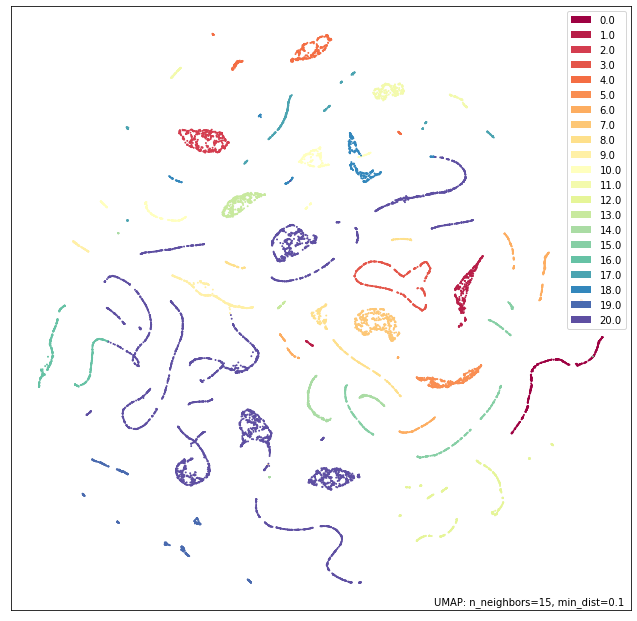

In [ ]:
umap.plot.points(mapper2, labels=labels_total)

In [ ]:
c = ["DL Alpha Alanine","DL Aspartic Acid","DL Isoleucine","DL Leucine",
"DL Methionine", "DL Phenylalanine"
, "DL Serine"
, "DL Threonine"
, "DL Tyrosine"
, "DL Valine", "Glycine"
, "L Arginine HCl"
,"L Asparagine Monohydrate"
, "L Cystine", "L Glutamic Acid","L Histidine HCl",
"L Lysine HCl",
"L (+) Cysteine HCl",
 "L Proline","L Tryptophan", "Never seen before"]

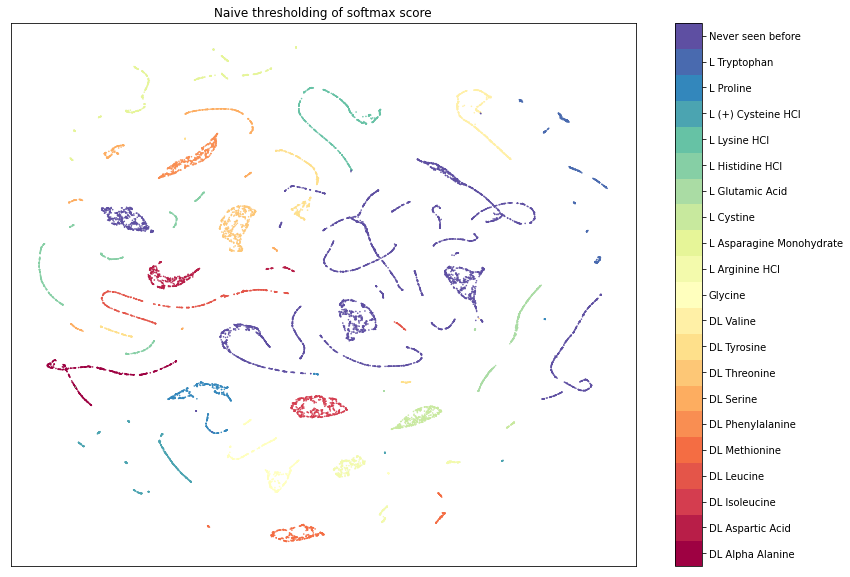

In [ ]:
embedding = umap.UMAP(n_neighbors=15,min_dist=0.1).fit_transform(predictions_total)

target = np.hstack(labels_total)

fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*embedding.T, s=0.3, c=target, cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(22) -0.5)
cbar.set_ticks(np.arange(21))
cbar.set_ticklabels(c)
plt.title('Naive thresholding of softmax score');